In [3]:
from forex_python.bitcoin import BtcConverter

b = BtcConverter()

In [5]:
from datetime import datetime

start = datetime(2015,1,1)
end = datetime.today()

In [6]:
price_data = b.get_previous_price_list("USD", start, end)

In [7]:
len(price_data)

3334

In [8]:
type(price_data)

dict

In [13]:
import pandas as pd

prices = pd.DataFrame(price_data.items(), columns=["date", "price"])

In [14]:
prices

,date,price
0,2015-01-01,317.2040
1,2015-01-02,314.4990
2,2015-01-03,311.1410
3,2015-01-04,277.8530
4,2015-01-05,270.8130
...,...,...
3329,2024-02-16,51980.5505
3330,2024-02-17,51717.2523
3331,2024-02-18,52203.9810
3332,2024-02-19,52020.2098


In [15]:
prices = prices.set_index('date')

In [16]:
prices

,price
date,
2015-01-01,317.2040
2015-01-02,314.4990
2015-01-03,311.1410
2015-01-04,277.8530
2015-01-05,270.8130
...,...
2024-02-16,51980.5505
2024-02-17,51717.2523
2024-02-18,52203.9810


In [18]:
prices.loc["2017-01-01":"2018-01-01"]

,price
date,
2017-01-01,964.3250
2017-01-02,1009.9738
2017-01-03,1028.3338
2017-01-04,1047.1000
2017-01-05,1140.3850
...,...
2017-12-28,14362.4038
2017-12-29,14867.5725
2017-12-30,13643.6950


<Axes: xlabel='date'>

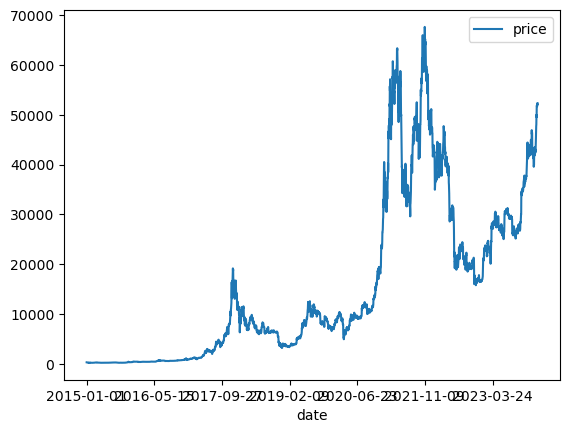

In [19]:
prices.plot()

<Axes: xlabel='date'>

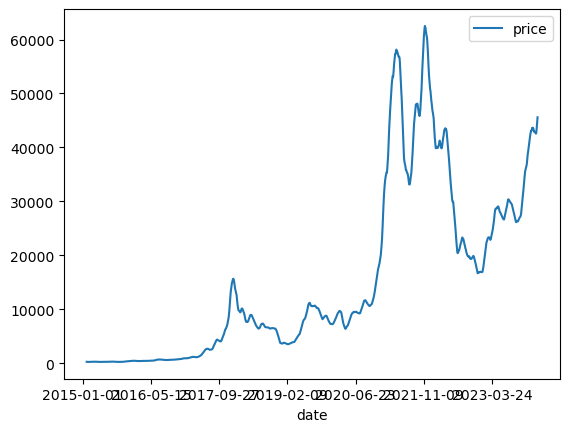

In [21]:
prices.rolling(30).mean().plot()

<Axes: xlabel='date'>

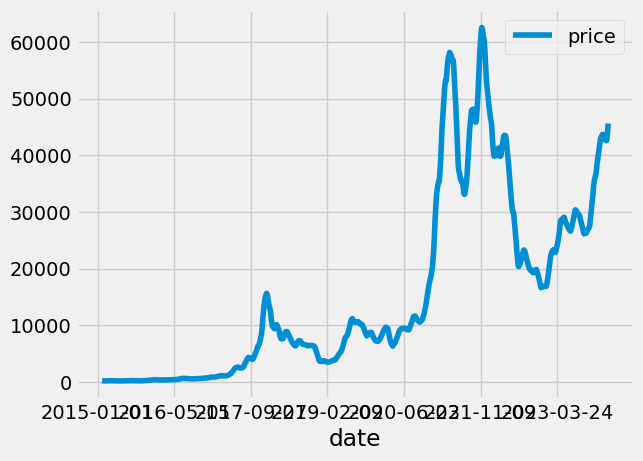

In [22]:
import matplotlib.style as style

style.use('fivethirtyeight')

rolling = prices.rolling(30).mean()

rolling.plot()

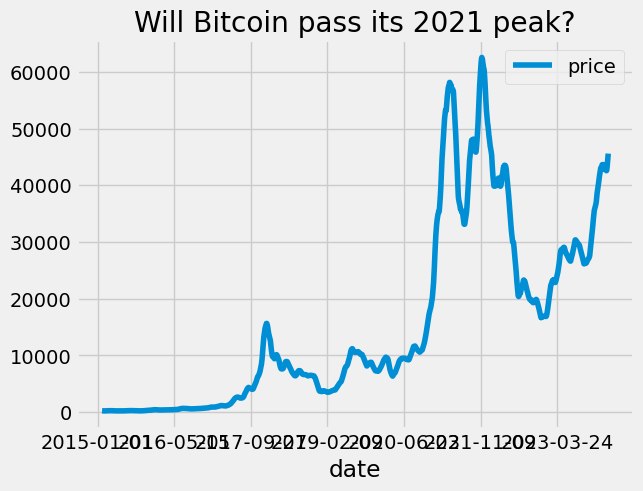

In [23]:
import matplotlib.pyplot as plt

ax = rolling.plot()

plt.title("Will Bitcoin pass its 2021 peak?")
plt.show()

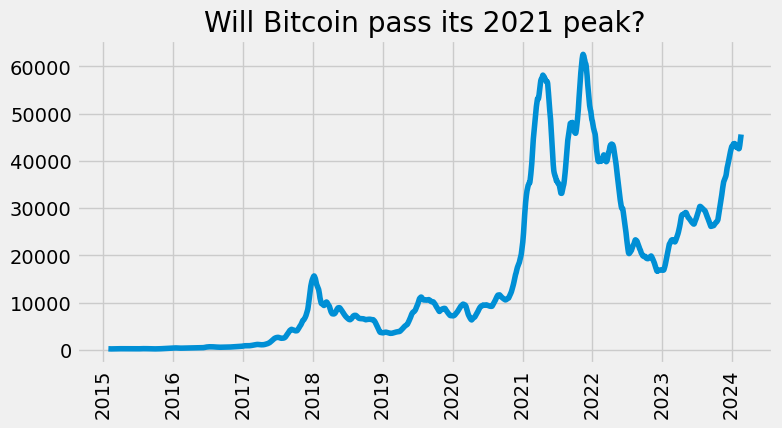

In [26]:
fig,ax = plt.subplots(figsize=(8,4))

ax.plot(rolling.index.values, rolling["price"], linewidth=4)

ticks = ["2015-01-01", "2016-01-01", "2017-01-01", "2018-01-01", "2019-01-01", "2020-01-01", "2021-01-01", "2022-01-01", "2023-01-01", "2024-01-01"]
tick_labels = ["2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022", "2023", "2024"]

plt.title("Will Bitcoin pass its 2021 peak?")
plt.xticks(ticks, rotation="vertical")
ax.set_xticklabels(tick_labels)

plt.show()

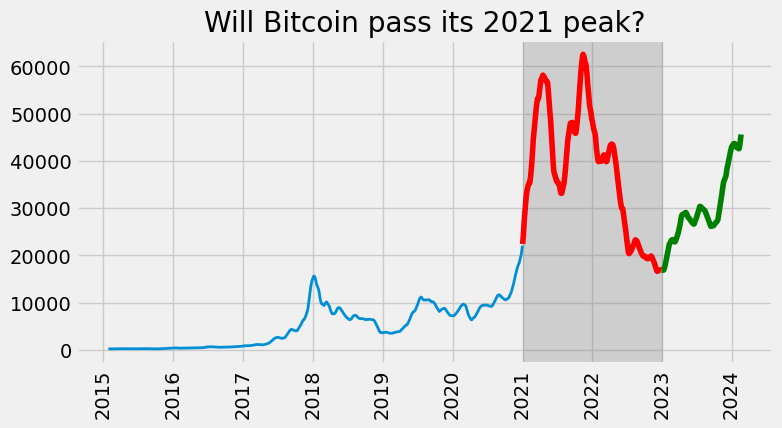

In [32]:
pre_2021 = rolling.loc[:"2020-12-31"]
post_2021 = rolling.loc["2021-01-01":"2022-12-31"]
post_2023 = rolling.loc["2023-01-01":]

fig,ax = plt.subplots(figsize=(8,4))

ax.plot(pre_2021.index.values, pre_2021["price"], linewidth=2)

ax.plot(post_2021.index.values, post_2021["price"], linewidth=4, color="red")

ax.plot(post_2023.index.values, post_2023["price"], linewidth=4, color="green")

ax.axvspan(xmin=2192, xmax=726+2192, ymin=0, alpha=0.3, color='grey')

ticks = ["2015-01-01", "2016-01-01", "2017-01-01", "2018-01-01", "2019-01-01", "2020-01-01", "2021-01-01", "2022-01-01", "2023-01-01", "2024-01-01"]
tick_labels = ["2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022", "2023", "2024"]

plt.title("Will Bitcoin pass its 2021 peak?")
plt.xticks(ticks, rotation="vertical")
ax.set_xticklabels(tick_labels)

plt.show()

In [30]:
pre_2021.shape

(2192, 1)

In [31]:
post_2021.shape

(726, 1)

Next Steps

In [33]:
#cut earlier data
#change the colors to represent upward and downward price trends
#add labels for x and y